<h1 style="text-align: center;">Laptop Price Predictor</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set the global style properties for all plots
sns.set(style="whitegrid")
sns.set_palette("viridis")
plt.rcParams["axes.titleweight"] = "bold"

In [3]:
df = pd.read_csv('../Dataset/laptop_data.csv')

### Feature Engineering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
duplicated = df.duplicated().sum()
null_count = df.isnull().sum()

print(f"Duplicated Sum: {duplicated}\n{'-'*25}")
print(f"Null Count:\n{'-'*25}\n{null_count}")

Duplicated Sum: 0
-------------------------
Null Count:
-------------------------
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [6]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#### 01. Unnamed

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

#### 02. Company

In [8]:
company_counts = df['Company'].value_counts()
company_counts

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

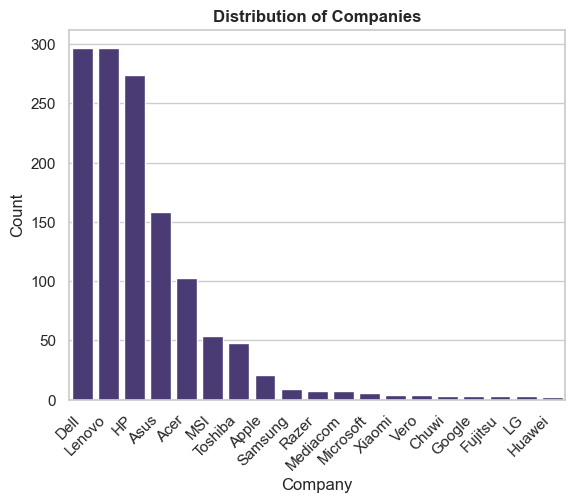

In [9]:
sns.countplot(x='Company', data=df, order=company_counts.index)
plt.xticks(rotation=45, ha='right')

plt.title('Distribution of Companies')
plt.ylabel('Count')
plt.show()

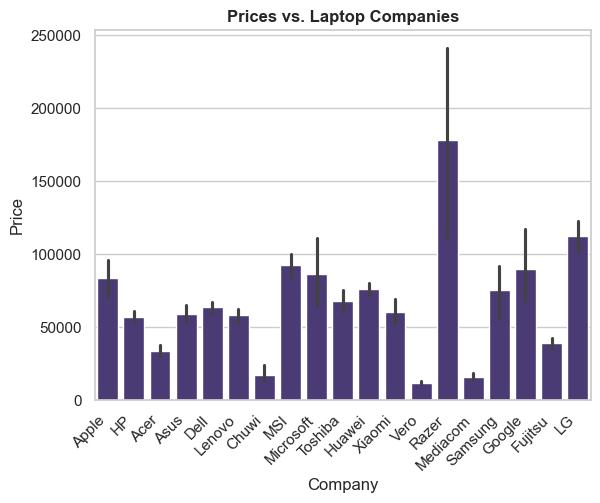

In [10]:
sns.barplot(x='Company', y='Price', data=df)
plt.xticks(rotation=45, ha='right')

plt.title('Prices vs. Laptop Companies')
plt.show()

#### 03. Laptop Type

In [11]:
laptop_types = df['TypeName'].value_counts()
laptop_types

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

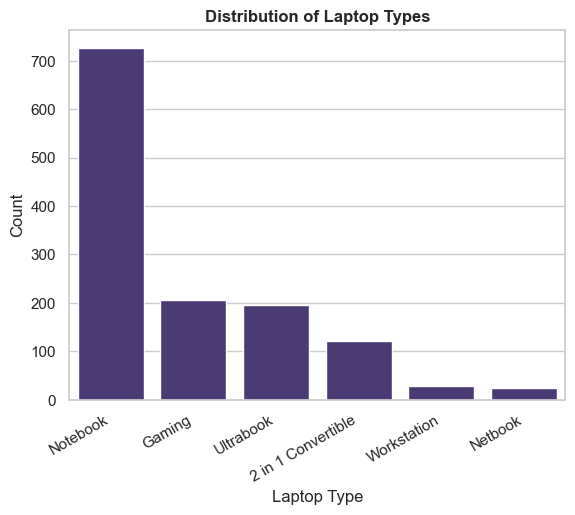

In [12]:
sns.countplot(x='TypeName', data=df, order=laptop_types.index)
plt.xticks(rotation=30, ha='right')

plt.title('Distribution of Laptop Types')
plt.xlabel('Laptop Type')
plt.ylabel('Count')
plt.show()

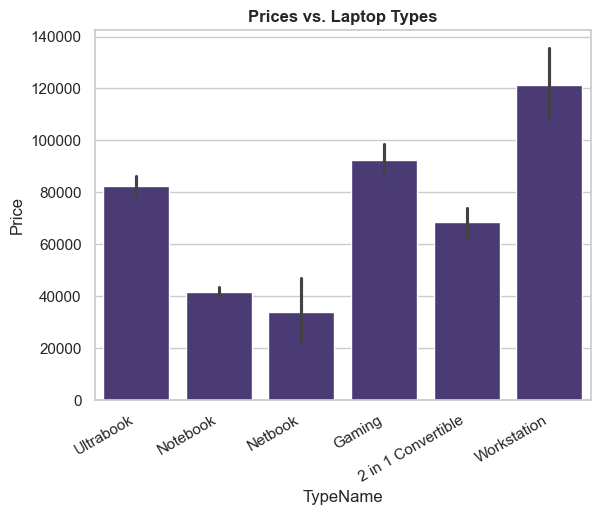

In [13]:
sns.barplot(x='TypeName', y='Price', data=df)
plt.xticks(rotation=30, ha='right')

plt.title('Prices vs. Laptop Types')
plt.show()

#### 04. Screen Inches

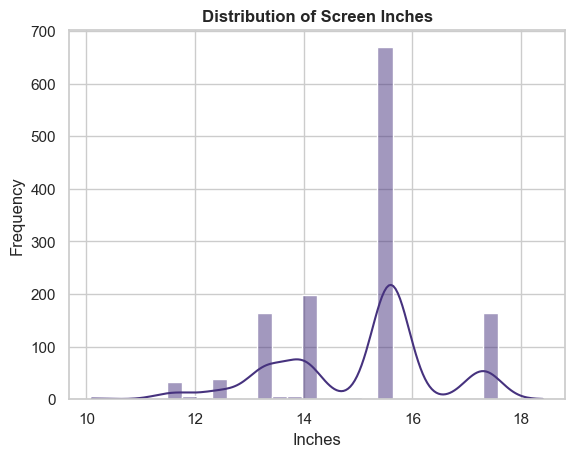

In [14]:
sns.histplot(df['Inches'], kde=True, bins=30)

plt.title('Distribution of Screen Inches')
plt.ylabel('Frequency')

plt.show()

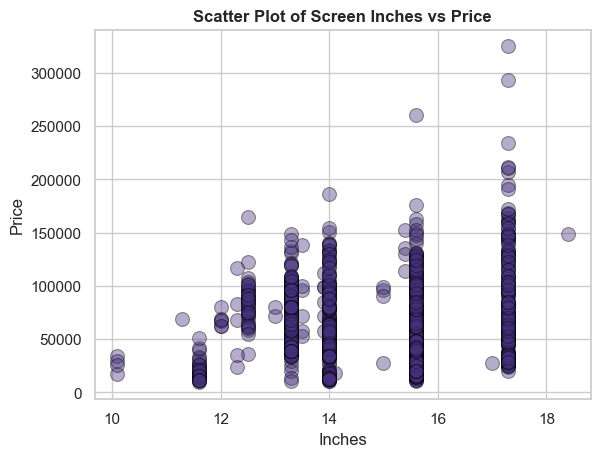

In [15]:
sns.scatterplot(x='Inches', y='Price', data=df, edgecolor='black', s=100, alpha=0.4)

plt.title('Scatter Plot of Screen Inches vs Price')
plt.xlabel('Inches')
plt.ylabel('Price')

plt.show()

#### 05. Screen Resolution

In [16]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [17]:
resolution_counts = df['ScreenResolution'].value_counts()
resolution_counts

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [18]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [19]:
temp = ['Inches', 'ScreenResolution', 'IPS', 'TouchScreen']
df[temp].sample(5)

,Inches,ScreenResolution,IPS,TouchScreen
1276,15.6,1366x768,0,0
418,15.6,1366x768,0,0
669,15.6,1366x768,0,0
182,13.9,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,1,1
753,14.0,Full HD 1920x1080,0,0


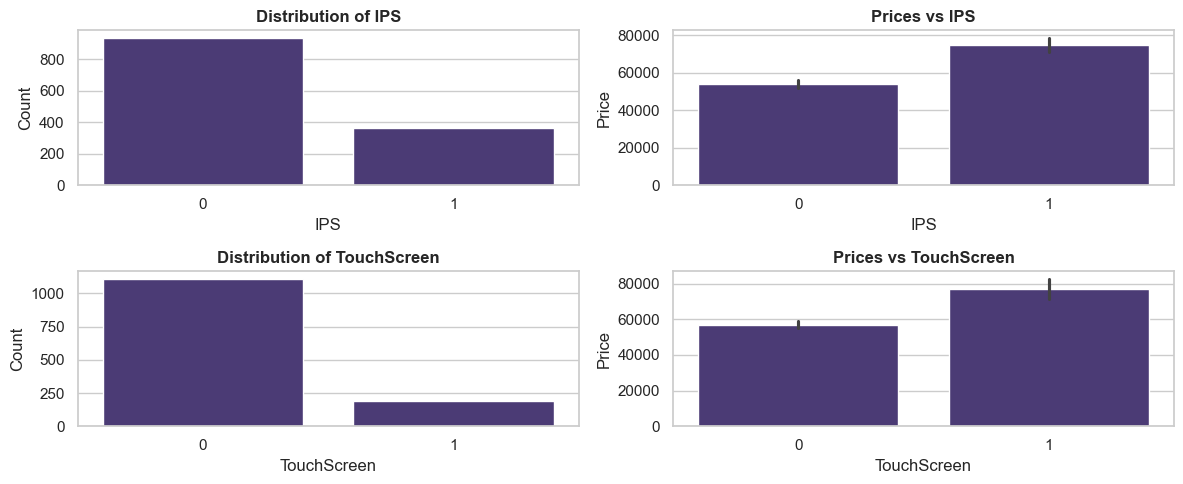

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# plot 1:
sns.countplot(x='IPS', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of IPS')
axes[0, 0].set_ylabel('Count')

# plot 2:
sns.barplot(x='IPS', y='Price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Prices vs IPS')

# plot 3:
sns.countplot(x='TouchScreen', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of TouchScreen')
axes[1, 0].set_ylabel('Count')

# plot 4:
sns.barplot(x='TouchScreen', y='Price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Prices vs TouchScreen')

plt.tight_layout()
plt.show()

In [21]:
def get_resolution(data):
    x, y = [], []
    data = data.str.split()
    m = data.shape[0]
    for i in range(m):
        z = (data[i][-1]).split('x')
        x.append(int(z[0]))
        y.append(int(z[1]))
    return x, y

func = get_resolution(df['ScreenResolution'])
df['X Resolution'] = func[0]
df['Y Resolution'] = func[1]

In [22]:
temp.extend(['X Resolution', 'Y Resolution'])

In [23]:
df[temp].sample(5)

,Inches,ScreenResolution,IPS,TouchScreen,X Resolution,Y Resolution
475,14.0,1366x768,0,0,1366,768
898,15.6,1366x768,0,0,1366,768
1140,14.0,IPS Panel Touchscreen 2560x1440,1,1,2560,1440
37,17.3,IPS Panel Full HD 1920x1080,1,0,1920,1080
675,15.6,Full HD 1920x1080,0,0,1920,1080


In [24]:
df[temp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inches            1303 non-null   float64
 1   ScreenResolution  1303 non-null   object 
 2   IPS               1303 non-null   int64  
 3   TouchScreen       1303 non-null   int64  
 4   X Resolution      1303 non-null   int64  
 5   Y Resolution      1303 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 61.2+ KB


In [25]:
x = df['X Resolution']**2
y = df['Y Resolution']**2

df['PPI'] = ((x + y)**0.5)/df['Inches']
df['PPI'] = df['PPI'].astype('float64')
df['PPI'].head()

0    226.983005
1    127.677940
2    141.211998
3    220.534624
4    226.983005
Name: PPI, dtype: float64

In [26]:
temp.append('PPI')
temp.append('Price')
temp.remove('ScreenResolution')
temp

['Inches',
 'IPS',
 'TouchScreen',
 'X Resolution',
 'Y Resolution',
 'PPI',
 'Price']

In [27]:
df[temp].corr()['Price']

Inches          0.068197
IPS             0.252208
TouchScreen     0.191226
X Resolution    0.556529
Y Resolution    0.552809
PPI             0.473487
Price           1.000000
Name: Price, dtype: float64

In [28]:
df.drop(columns=['ScreenResolution', 'X Resolution', 'Y Resolution', 'Inches'], inplace=True)

In [29]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,226.983005


#### 06. CPU

In [30]:
cpu_counts = df['Cpu'].value_counts()
cpu_counts

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [31]:
df['temp_df'] = df['Cpu'].apply(
    lambda x: " ".join(x.split()[0:3])
)

In [32]:
df['temp_df'].sample(10)

506     Intel Core i7
399     Intel Core i7
333     Intel Core i3
747     Intel Core i3
382     Intel Core i7
428     Intel Core i7
953      Intel Core M
1236    Intel Core i7
1143    Intel Core i7
1111    Intel Core i5
Name: temp_df, dtype: object

In [33]:
df['temp_df'].value_counts()

temp_df
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1


In [34]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    return 'AMD Processor'

In [35]:
df['CPU Brand'] = df['temp_df'].apply(fetch_processor)

In [36]:
df.drop(columns=['Cpu', 'temp_df'], inplace=True)

In [37]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,CPU Brand
192,Xiaomi,Ultrabook,8GB,256GB SSD,Nvidia GeForce MX150,No OS,1.3kg,53274.6720,1,0,165.632118,Intel Core i5
1139,HP,Ultrabook,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.88kg,115709.2416,0,0,141.211998,Intel Core i7
886,Dell,Notebook,4GB,1TB HDD,AMD Radeon R5 M420X,Linux,2.18kg,24279.6960,0,0,100.454670,Intel Core i3
587,Lenovo,Ultrabook,12GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.4kg,89137.4400,1,0,157.350512,Intel Core i7
828,Acer,Netbook,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35kg,18914.4000,1,0,135.094211,Other Intel Processor


In [38]:
cpu_counts = df['CPU Brand'].value_counts()
cpu_counts

CPU Brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

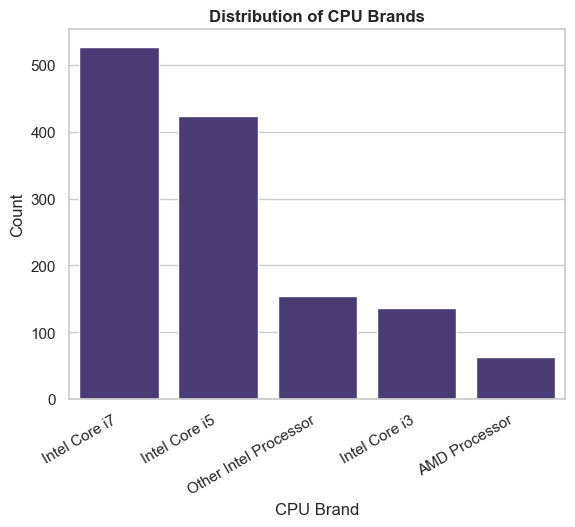

In [39]:
sns.countplot(x='CPU Brand', data=df, order=cpu_counts.index)
plt.xticks(rotation=30, ha='right')

plt.title('Distribution of CPU Brands')
plt.ylabel('Count')
plt.show()

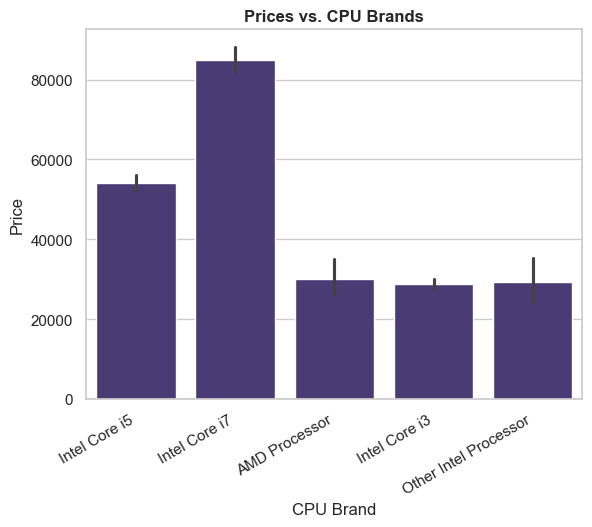

In [40]:
sns.barplot(x='CPU Brand', y='Price', data=df)
plt.xticks(rotation=30, ha='right')

plt.title('Prices vs. CPU Brands')
plt.show()

#### 07. RAM

In [41]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype('int32')

In [42]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,CPU Brand
1218,Lenovo,Gaming,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.6kg,67772.1600,1,0,141.211998,Intel Core i7
745,Acer,Notebook,2,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.68kg,17582.4000,0,0,111.935204,Other Intel Processor
422,HP,Notebook,8,256GB SSD,Intel HD Graphics 630,Windows 10,2.31kg,76030.5600,0,0,141.211998,Intel Core i7
25,Dell,Notebook,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.3kg,22305.1392,0,0,100.454670,Intel Core i3
285,Acer,Notebook,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.15kg,35111.5200,1,1,141.211998,Intel Core i7


In [43]:
ram_counts = df['Ram'].value_counts()
ram_counts

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

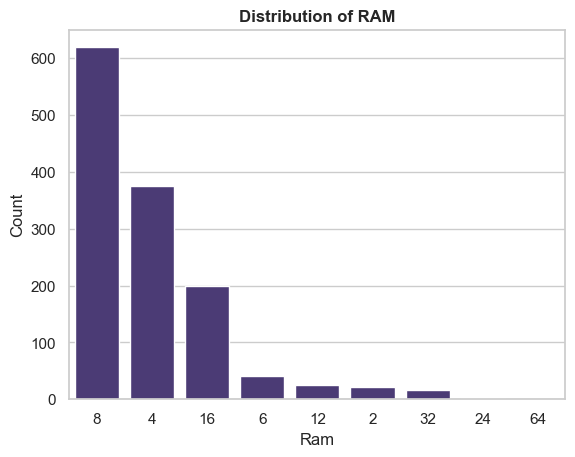

In [44]:
sns.countplot(x='Ram', data=df, order=ram_counts.index)

plt.title('Distribution of RAM')
plt.ylabel('Count')
plt.show()

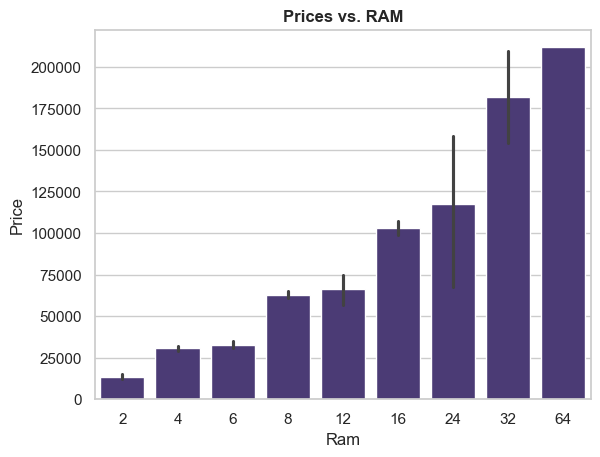

In [45]:
sns.barplot(x='Ram', y='Price', data=df)

plt.title('Prices vs. RAM')
plt.show()

#### 08. Memory

#### 09. GPU

#### 10. Operating System

#### 11. Weight

In [46]:
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].astype('float32')

In [47]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5


#### 12. Price

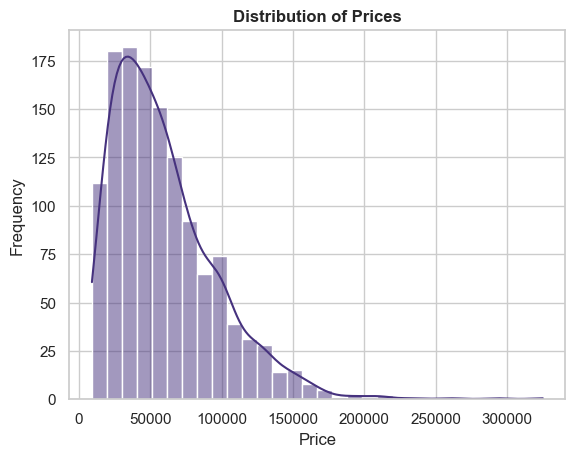

In [48]:
sns.histplot(df['Price'], kde=True, bins=30)

plt.title('Distribution of Prices')
plt.ylabel('Frequency')

plt.show()

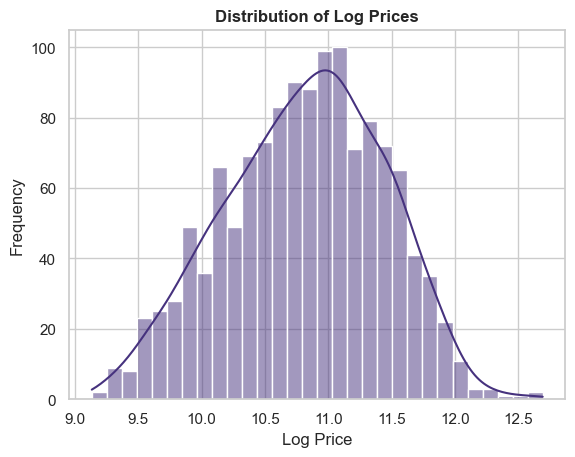

In [49]:
price = np.log(df['Price'])

sns.histplot(price, kde=True, bins=30)

plt.title('Distribution of Log Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')

plt.show()